# Task:

Derive similarity score between two sentences applying three different techniques. 
- Reference Article: [A beginner’s guide to measuring sentence similarity](https://medium.com/@igniobydigitate/a-beginners-guide-to-measuring-sentence-similarity-f3c78b9da0bc)

## Sentence Embedding

Sentence embedding represents a sentence as a vector of numbers. This numerical representation of a sentence is called sentence embedding. In a word embedding corresponds to a particular feature or aspect of the word. A sentence embedding is based on a similar concept where the dimensions collectively capture different aspects of the words used in the sentence, the grammatical structure of the sentence, and maybe some more underlying information.

There are various ways in which a sentence embedding can be created. Once we have each sentence represented as a vector of numbers, then the problem of finding sentence similarity translates to the problem of finding similarity between these numeric vectors.

In this notebook I will discuss a couple of statistical techniques to create numeric representations of sentences and briefly explore an idea of how one can utilize word embeddings for the same task. I will also discuss how similarity between sentence embeddings can be computed.

## Sample sentences

We take sentences form two unrelated movies to work with. This is done with the goal to demonstrate how sentences turn out to be either similar or dissimilar across these movies. I expect sentences from spiderman to show higher similarity with other senteces from the same movie and a lower similarity score from the sentences from the movie Godfather.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Sample sentences from Spider-Man
spiderman_sentences = [
    "With great power comes great responsibility.",
    "I missed the part where that's my problem.",
    "You're not Superman, you know.",
    "Remember, with great power comes great responsibility.",
    "I'm just Peter Parker. I'm Spider-Man no more.",
    "Whatever life holds in store for me, I will never forget these words.",
    "The truth is, I am Spider-Man.",
    "This is my gift, my curse. Who am I? I'm Spider-Man.",
    "Sometimes, to do what's right, we have to be steady and give up the things we want the most.",
    "I want to tell you the truth... here it is: I'm Spider-Man."
]

# Sample sentences from The Godfather
godfather_sentences = [
    "I'm gonna make him an offer he can't refuse.",
    "Revenge is a dish best served cold.",
    "A man who doesn't spend time with his family can never be a real man.",
    "Leave the gun. Take the cannoli.",
    "The lawyer with the briefcase can steal more money than the man with the gun.",
    "It's not personal, Sonny. It's strictly business.",
    "Women and children can be careless, but not men.",
    "Power wears out those who do not have it.",
    "Friendship is everything. Friendship is more than talent. It is more than the government. It is almost the equal of family.",
    "Great men are not born great, they grow great."
]

all_sentences = spiderman_sentences + godfather_sentences

## Bag of words

The basic idea is to find out which words are present in a sentence and assess the importance of a word based on how many times it occurs in a sentence.

#### Creating a dictionary and removing stop words

Words such as is, are, a, an, the etc do not add much value in terms of providing context to a sentence. These are called stop words. So before we go ahead and count the frequency of words, we want to remove these stop words from the sentences.

In [ ]:
# Define a list of stop words
stop_words = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves',
    'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their',
    'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was',
    'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the',
    'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against',
    'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',
    'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own',
    'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'
}

#### Removing punctuations
Before we go ahead and remove stop words, we first want to remove punctuations from the words so that they also get flagged as stop words. And even if not we don't want to consider men and men. as different words. So we remove punctuations.

Explanation of code below:

- str.maketrans('', '', string.punctuation) creates a translation table that maps each character in string.punctuation to None.
- str.maketrans is a static method that returns a translation table usable for str.translate.
- The first two arguments are empty strings ('') because we are not replacing any characters, only removing.
- The third argument is string.punctuation, which contains all punctuation characters.
- word.translate(...) uses the translation table to remove all punctuation characters from the word.

In [ ]:
import string
def remove_punctuation(word):
    return word.translate(str.maketrans('', '', string.punctuation))

In [ ]:
# Sample sentence
sentence = "This is an example sentence showing the removal of stop words."

def remove_stop_words(sentence):
    
    # Tokenize the sentence
    words = sentence.lower().split()
    
    # Remove stop words
    filtered_words = [remove_punctuation(word) for word in words if word not in stop_words]
    
    # Join the words back into a sentence
    filtered_sentence = ' '.join(filtered_words)

    return filtered_sentence

print("Original sentence:", sentence)
print("Filtered sentence:", remove_stop_words(sentence))

Original sentence: This is an example sentence showing the removal of stop words.
Filtered sentence: example sentence showing removal stop words


In [ ]:
# Removing stopwords from all sentences in our database

spiderman_stop_removed = []
godfather_stop_removed = []

for sentence in spiderman_sentences:
    spiderman_stop_removed.append(remove_stop_words(sentence).split())

for sentence in godfather_sentences:
    godfather_stop_removed.append(remove_stop_words(sentence).split())

print("spiderman_original:")
print(spiderman_sentences[0])
print(spiderman_sentences[1])
print(spiderman_sentences[2])
print()
print("spiderman_stop_removed:")
print(spiderman_stop_removed[0])
print(spiderman_stop_removed[1])
print(spiderman_stop_removed[2])


spiderman_original:
With great power comes great responsibility.
I missed the part where that's my problem.
You're not Superman, you know.

spiderman_stop_removed:
['great', 'power', 'comes', 'great', 'responsibility']
['missed', 'part', 'thats', 'problem']
['youre', 'superman', 'know']


#### Creating a dictionary of words in all sentences

Now that we have removed the stop words, let's create a dictionary of all non stop words and create a dataset where for each sentence we have a row of frequency of each word

In [ ]:
# Creating a set of all unique words

# Let's combine all arrays into one
all_sentences_stop_removed = spiderman_stop_removed+ godfather_stop_removed

# get unique words from all sentences and put it into a set
unique_words = set()
for sentence in all_sentences_stop_removed:
    for word in sentence:
        unique_words.add(word)

print(f"Total unique words : {len(unique_words)}")

Total unique words : 82


#### Creating the dataframe that shows the word count of each sentence

In [ ]:
from collections import Counter

In [ ]:
# Create a frequency matrix
frequency_matrix = []

for sentence in all_sentences_stop_removed:
    word_count = Counter(sentence)
    frequency_matrix.append([word_count.get(word, 0) for word in unique_words])

# Create a DataFrame
df = pd.DataFrame(frequency_matrix, columns=list(unique_words))
print(df)

    remember  equal  know  superman  man  lawyer  money  real  cannoli  im  \
0          0      0     0         0    0       0      0     0        0   0   
1          0      0     0         0    0       0      0     0        0   0   
2          0      0     1         1    0       0      0     0        0   0   
3          1      0     0         0    0       0      0     0        0   0   
4          0      0     0         0    0       0      0     0        0   2   
5          0      0     0         0    0       0      0     0        0   0   
6          0      0     0         0    0       0      0     0        0   0   
7          0      0     0         0    0       0      0     0        0   1   
8          0      0     0         0    0       0      0     0        0   0   
9          0      0     0         0    0       0      0     0        0   1   
10         0      0     0         0    0       0      0     0        0   1   
11         0      0     0         0    0       0      0     0   

#### Using cosine similarity to calculate how similar the sentences are

Consider that two n-dimensional arrays are plotted as two vectors in an n-dimensional space. Cosine similarity measures the angle between these two vectors and returns a value between -1 and 1. Mathematically, given two vectors A and B, cosine similarity is calculated as follows:

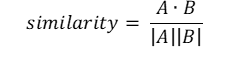

where,


- A.B = Dot product between two vectors. It is calculated by adding the product of corresponding vector values.


- |A|, |B| = Magnitude of a vector. It is the square root of the sum of squares of all the vector values.

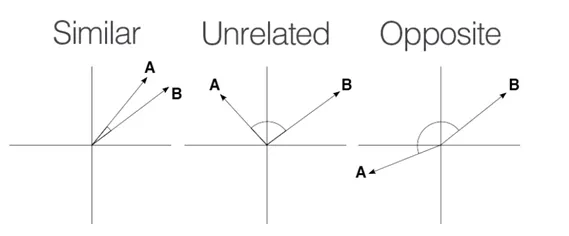

#### The cosine similarity function

In [ ]:
def consine(vec1, vec2):
    # Compute the dot product
    dot_product = np.dot(vec1, vec2)
    
    # Compute the Euclidean norm (magnitude) of each vector
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    
    # Compute the cosine similarity
    if norm_vec1 == 0 or norm_vec2 == 0:
        return 0.0
    else:
        return dot_product / (norm_vec1 * norm_vec2)

In [ ]:
# Testing this between two sentences within the spiderman movie
print(all_sentences)
print(len(all_sentences))

['With great power comes great responsibility.', "I missed the part where that's my problem.", "You're not Superman, you know.", 'Remember, with great power comes great responsibility.', "I'm just Peter Parker. I'm Spider-Man no more.", 'Whatever life holds in store for me, I will never forget these words.', 'The truth is, I am Spider-Man.', "This is my gift, my curse. Who am I? I'm Spider-Man.", "Sometimes, to do what's right, we have to be steady and give up the things we want the most.", "I want to tell you the truth... here it is: I'm Spider-Man.", "I'm gonna make him an offer he can't refuse.", 'Revenge is a dish best served cold.', "A man who doesn't spend time with his family can never be a real man.", 'Leave the gun. Take the cannoli.', 'The lawyer with the briefcase can steal more money than the man with the gun.', "It's not personal, Sonny. It's strictly business.", 'Women and children can be careless, but not men.', 'Power wears out those who do not have it.', 'Friendship is

In [ ]:
# Let's try the first and the 4th statement
all_sentences[0]

'With great power comes great responsibility.'

In [ ]:
all_sentences[3]

'Remember, with great power comes great responsibility.'

In [ ]:
consine(df.loc[0], df.loc[3])

0.9354143466934852

In [ ]:
# Let's pick a sentence that does not have power or responsibility in it
all_sentences[18]

'Friendship is everything. Friendship is more than talent. It is more than the government. It is almost the equal of family.'

In [ ]:
consine(df.loc[0], df.loc[18])

0.0

This is not similar at at all!

Let's write a function that given two sentences does this process end to end

In [ ]:
def findSimilarityBagOfWords(sentence1, sentence2):
    # combining sentences to an array
    sentences = [sentence1, sentence2]
    stop_removed = []

    # removing stop words and punctuation from the words
    for sentence in sentences:
        stop_removed.append(remove_stop_words(sentence).split())

    # getting list of unique words
    unique_words = set()
    for sentence in stop_removed:
        for word in sentence:
            unique_words.add(word)

    # Create a frequency matrix
    frequency_matrix = []
    
    for sentence in stop_removed:
        word_count = Counter(sentence)
        frequency_matrix.append([word_count.get(word, 0) for word in unique_words])
    
    # Create a DataFrame
    df = pd.DataFrame(frequency_matrix, columns=list(unique_words))
    print(f"Similarity score: {consine(df.loc[0], df.loc[1])}")
    return df

In [ ]:
findSimilarityBagOfWords("Who let the dogs out!", "Who let the cats out!")

Similarity score: 0.6666666666666667


,out,dogs,let,cats
0,1,1,1,0
1,1,0,1,1


In [ ]:
findSimilarityBagOfWords("Mamma mia , here we go again ", "My my! how can I resist you ?")

Similarity score: 0.0


,mia,resist,mamma,go,my
0,1,0,1,1,0
1,0,1,0,0,1


In [ ]:
paragraph1 = "In the bustling city of Metropolis, the skyline is dominated by towering skyscrapers that reach for the heavens. The streets below are a hive of activity, with people from all walks of life hurrying to and fro. The air is filled with the sounds of honking cars, distant sirens, and the constant chatter of passersby. Amidst the urban chaos, pockets of tranquility can be found in the form of small parks and green spaces, offering a brief respite from the hustle and bustle. At night, the city transforms into a sea of lights, with neon signs and street lamps illuminating the dark, creating a vibrant and lively atmosphere that never seems to sleep."
paragraph2 = "In the tranquil town of Riverview, life moves at a leisurely pace. The town is known for its picturesque scenery, with rolling hills and a serene river that winds its way through the heart of the community. The streets are lined with charming houses, each with well-tended gardens bursting with colorful flowers. The sound of birds singing fills the air, and the occasional laughter of children playing can be heard in the distance. Riverview's town square is a hub of local activity, where residents gather for farmers' markets, craft fairs, and community events. As the sun sets, the town is bathed in a golden glow, and the sky is painted with hues of pink and orange, bringing a peaceful end to another day in this idyllic setting."

print(paragraph1)
print()
print(paragraph2)

In the bustling city of Metropolis, the skyline is dominated by towering skyscrapers that reach for the heavens. The streets below are a hive of activity, with people from all walks of life hurrying to and fro. The air is filled with the sounds of honking cars, distant sirens, and the constant chatter of passersby. Amidst the urban chaos, pockets of tranquility can be found in the form of small parks and green spaces, offering a brief respite from the hustle and bustle. At night, the city transforms into a sea of lights, with neon signs and street lamps illuminating the dark, creating a vibrant and lively atmosphere that never seems to sleep.

In the tranquil town of Riverview, life moves at a leisurely pace. The town is known for its picturesque scenery, with rolling hills and a serene river that winds its way through the heart of the community. The streets are lined with charming houses, each with well-tended gardens bursting with colorful flowers. The sound of birds singing fills th

In [ ]:
findSimilarityBagOfWords(paragraph1, paragraph2)

Similarity score: 0.05466133744605251


,streets,markets,hustle,occasional,bringing,neon,metropolis,hub,pink,orange,...,distance,serene,bathed,community,form,scenery,activity,hues,residents,day
0,1,0,1,0,0,1,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,1,1,0,1,1,0,0,1,1,1,...,1,1,1,2,0,1,1,1,1,1


## TF-IDF

#### Explanation of TF-IDF 

Term frequency - Inverse Document Frequency

The bag of words approach gives equal weight to all words. However, a more sophisticated approach is the TF-IDF approach. TF-IDF stands for Term Frequency — Inverse Document Frequency. This approach is based on the rationale that the most common words are usually the least significant ones. While stop words are removed in the bag of words approach, **TF-IDF provides a more sophisticated approach to automatically give less weight to frequent words that appear in the whole corpus.**

Let's break it down further: 

**Term Frequency** : How frequent a term appears within the given document. Can be within the same sentence, paragraph or whole text.

**Inverse Document Frequency** : This is representative of how rare this word is across all the documents in the corpus. 

IDF is calculated by taking the logarithm of the ratio of the total number of documents and the number of documents containing the word (document frequency). The more frequently the word appears across the corpus, the lower its inverse document frequency making it less important. Similarly, the rarer the word in the corpus, the higher its inverse document frequency. 

Mathematically,

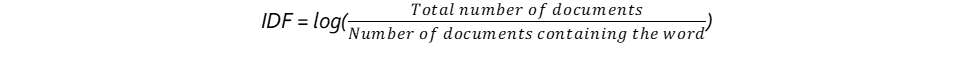

The TF-IDF value for a word can be calculated as follows:

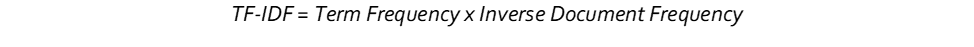

#### What makes TF-IDF better than Bag of words ?

Let's find out by trying it out. 

**Step 1**: Create a corpus of words, that we have already done for the bag of words. 

**Step 2**: Create a dicrionary of words from the corpus. Already done for bag of words `unique_words`

**Step 3**: Creating the word embeddings. This is where the difference comes in between bag of words and TF-IDF. Instead of just sticking to the term frequency, we also calculate the Inverse Document Frequency and multiple it with the TF to get the TF-IDF value for the word in the sentence.

In [ ]:
import math

# Let's go through all sentences and words and create a counter of how many times a word has appeared across documents
idf = {}

# We pick the array of all sentences that have stop words removed [][]
for words_arr in all_sentences_stop_removed:
    unique_words_in_sentence = set(words_arr)

    # for each of these unique words, increment the value in the idf array
    for word in unique_words_in_sentence:
        if word in idf :
            idf[word] =  idf[word] + 1
        else:
            idf[word] = 1
            
number_of_documents = len(all_sentences_stop_removed)



# Create a frequency matrix
# Each row corresponds to each sentence
# Each colunm corresponds to one unique word in the corpus of unique words
frequency_matrix = []

for sentence in all_sentences_stop_removed:
    word_count = Counter(sentence)
    frequency_matrix.append([word_count.get(word, 0) * (math.log(number_of_documents / idf[word]) ) for word in unique_words])

# Create a DataFrame
df = pd.DataFrame(frequency_matrix, columns=list(unique_words))
print(df)

    remember     equal      know  superman       man    lawyer     money  \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.000000  0.000000  2.995732  2.995732  0.000000  0.000000  0.000000   
3   2.995732  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12  0.000000

We notice that the text embeddings are completely different in this case. However the calculation for the similarity still remains the same. We can use cosine similarity from the values present in this dataframe. 

In [ ]:
print(all_sentences[0])
print(all_sentences[3])
consine(df.loc[0], df.loc[3])

With great power comes great responsibility.
Remember, with great power comes great responsibility.


0.8724395002378096

Initially using bag of words, we got 0.9354143466934852

Now with TF-IDF we get 0.8724395002378096

Let's write it into it's own function so that we can compare different methods in parallel.

In [ ]:
def findSimilarityTfIdf(sentence1, sentence2):
    # combining sentences to an array
    sentences = [sentence1, sentence2]
    stop_removed = []

    # removing stop words and punctuation from the words
    for sentence in sentences:
        stop_removed.append(remove_stop_words(sentence).split())

    # getting list of unique words
    unique_words = set()
    for sentence in stop_removed:
        for word in sentence:
            unique_words.add(word)

    # Let's go through all sentences and words and create a counter of how many times a word has appeared across documents
    idf = {}
    # We pick the array of all sentences that have stop words removed [][]
    for words_arr in stop_removed:
        unique_words_in_sentence = set(words_arr)
    
        # for each of these unique words, increment the value in the idf dictionary
        for word in unique_words_in_sentence:
            if word in idf :
                idf[word] =  idf[word] + 1
            else:
                idf[word] = 1

    number_of_documents = len(stop_removed) 

    # Create a frequency matrix
    # Each row corresponds to each sentence
    # Each colunm corresponds to one unique word in the corpus of unique words
    frequency_matrix = []
    
    for sentence in stop_removed:
        sentence_word_counter = Counter(sentence)
        frequency_matrix.append([sentence_word_counter.get(word, 0) * (math.log(number_of_documents / idf[word]) ) for word in unique_words])

    # Create a DataFrame
    df = pd.DataFrame(frequency_matrix, columns=list(unique_words))
    print(f"Similarity score: {consine(df.loc[0], df.loc[1])}")
    return df

In [ ]:
def compareMethods(sentence1, sentence2, showDf):
    print(f"Sentence 1: {sentence1}")
    print()
    print(f"Sentence 2: {sentence2}")
    print()
    print("Bag of words")
    bowDf = findSimilarityBagOfWords(sentence1, sentence2)
    if(showDf):
        print(bowDf)
    print()
    print("TF-IDF")
    tfIdfDf = findSimilarityTfIdf(sentence1, sentence2)
    if(showDf):
        print(tfIdfDf)

In [ ]:
compareMethods("Who let the dogs out!", "Who let the cats out!", True)

Sentence 1: Who let the dogs out!
Sentence 2: Who let the cats out!

Bag of words
Similarity score: 0.6666666666666667
   out  dogs  let  cats
0    1     1    1     0
1    1     0    1     1

TF-IDF
Similarity score: 0.0
   out      dogs  let      cats
0  0.0  0.693147  0.0  0.000000
1  0.0  0.000000  0.0  0.693147


## Insights

We took two sentences 
- Who let the dogs out!
- Who let the cats out!

And we have a look at the word embeddings that were created using the two methods: 

TF-IDF:
```
   out      dogs  let      cats
0  0.0  0.693147  0.0  0.000000
1  0.0  0.000000  0.0  0.693147
```

Bag of words:
```
   out  dogs  let  cats
0    1     1    1     0
1    1     0    1     1
```

We notice that while TF-IDF heavily penalizes the common words such as out and let in the corpus, those words are given the same priority as the rare words when we use the bag of words method. This way we can get to understand how TF IDF works better than Bag of words.

## Semantic understanding

While the above two methods are able to statistically capture the similarities amongst the words, they fail at instances where we need to capture the semantic understanding of the sentences and then find similar ones. 

For example let's look at the following sentences where we praise two leaders of the world. 

Barack Obama: "Barack Obama's eloquence and unwavering commitment to social justice and equality have inspired millions around the globe, making him a beacon of hope and progressive change."

Angela Merkel: "Angela Merkel's steadfast leadership and pragmatic approach to governance have earned her immense respect, as she navigated Germany through numerous crises with remarkable poise and integrity."

In [ ]:
sentence1 = "Barack Obama's eloquence and unwavering commitment to social justice and equality have inspired millions around the globe, making him a beacon of hope and progressive change."
sentence2 = "Angela Merkel's steadfast leadership and pragmatic approach to governance have earned her immense respect, as she navigated Germany through numerous crises with remarkable poise and integrity."
compareMethods(sentence1, sentence2, showDf=False)

Sentence 1: Barack Obama's eloquence and unwavering commitment to social justice and equality have inspired millions around the globe, making him a beacon of hope and progressive change.

Sentence 2: Angela Merkel's steadfast leadership and pragmatic approach to governance have earned her immense respect, as she navigated Germany through numerous crises with remarkable poise and integrity.

Bag of words
Similarity score: 0.0

TF-IDF
Similarity score: 0.0


> This is crazy !! Both these sentences are about world leaders and in praise of them. This shows how Bag of words and Tf IDf are pretty rudimentary techniques objectively.

## Other Traditional Methods for Sentence Similarity

Before diving into neural network-based methods for calculating sentence similarity, it is beneficial to explore several traditional techniques. These methods are straightforward to implement and provide a solid foundation for understanding text similarity. Here are some notable traditional methods:

### 1. Jaccard Similarity
Jaccard similarity measures the similarity between two sets by comparing the size of their intersection to the size of their union. It is useful for comparing text based on the presence or absence of terms.

**Example:**
```python
def jaccard_similarity(set1, set2):
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    return len(intersection) / len(union)
```

### 2. Levenshtein Distance (Edit Distance)
Levenshtein distance calculates the minimum number of single-character edits (insertions, deletions, or substitutions) required to change one word into another. It measures the similarity between two strings.

**Example:**
```python
import Levenshtein

levenshtein_distance = Levenshtein.distance(sentence1, sentence2)
```

### 3. Overlap Coefficient
The overlap coefficient measures the overlap between two sets relative to the smaller set. It is particularly useful when comparing sets of different sizes.

**Example:**
```python
def overlap_coefficient(set1, set2):
    intersection = set1.intersection(set2)
    return len(intersection) / min(len(set1), len(set2))
```

### 4. Dice Coefficient
The Dice coefficient measures the similarity between two sets based on the ratio of twice the size of the intersection to the sum of the sizes of the sets.

**Example:**
```python
def dice_coefficient(set1, set2):
    intersection = set1.intersection(set2)
    return 2 * len(intersection) / (len(set1) + len(set2))
```

### Summary
These traditional methods offer various ways to measure the similarity between sentences without requiring complex model training. Each method has its strengths and weaknesses, depending on the specific use case and the nature of the text data. Exploring these techniques provides a solid foundation before moving on to more advanced, neural network-based methods for calculating sentence similarity.

## Applying a third technique for assignment completion

In [ ]:
def jaccard_similarity(set1, set2):
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    return len(intersection) / len(union)

In [ ]:
def overlap_coefficient(set1, set2):
    intersection = set1.intersection(set2)
    return len(intersection) / min(len(set1), len(set2))

In [ ]:
def dice_coefficient(set1, set2):
    intersection = set1.intersection(set2)
    return 2 * len(intersection) / (len(set1) + len(set2))

In [ ]:
# Comparing all traditional methods
def compare_other_traditional_methods(sentence1, sentence2):
    setSentence1 = set(sentence1.split())
    setSentence2 = set(sentence2.split())

    print(f"Jaccard similarity for sentence 1 and sentence 2 : {jaccard_similarity(setSentence1, setSentence2)}")
    print()
    print(f"Overlap Coefficient for sentence 1 and sentence 2 : {overlap_coefficient(setSentence1, setSentence2)}")
    print()
    print(f"Dice Coefficient for sentence 1 and sentence 2 : {dice_coefficient(setSentence1, setSentence2)}")

In [ ]:
# Example 1:
sentence1 = "the cat is on the mat"
sentence2 = "the mat is under the cat"
# Example 2
sentence3 = "The quick brown fox jumped over the lazy dog"
sentence4 = "The fast brown fox jumped over the sleepy dog"

In [ ]:
compare_other_traditional_methods(sentence1, sentence2)

Jaccard similarity for sentence 1 and sentence 2 : 0.6666666666666666

Overlap Coefficient for sentence 1 and sentence 2 : 0.8

Dice Coefficient for sentence 1 and sentence 2 : 0.8


# Further reading

We got a good gist of how similarity search works and how it can be implemented using traditional techniques. Next we will refer to the following resources and implement advanced techniques that help us to capture the theme, context and semantic meaning of the sentences while embedding them. These form the basis of applications like search engines, language translation and chatbots.

## Reference Links:
- [Word embeddings: Helping computers understand language semantics](https://medium.com/@igniobydigitate/word-embeddings-helping-computers-understand-language-semantics-dd3456b1f700)
- [word_vectors_game_of_thrones-LIVE- GitHub Notebook](https://github.com/llSourcell/word_vectors_game_of_thrones-LIVE/blob/master/Thrones2Vec.ipynb)

# Task
Find the percentage of major colors in an image.

## Libraries
- pillow (https://pypi.org/project/pillow/) : The Python Imaging Library adds image processing capabilities to your Python interpreter.
- numpy (https://numpy.org/doc/stable/) : NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

### Approach
We first write the implementation for one image and then generalize it as a function to be run across any given image

#### At a high level
1. Load Image: The image is loaded and converted to an RGB array.
2. K-means Clustering:
3. Histogram Calculation: After clustering, we calculate how many points (pixels) are in each cluster and determine the percentages for the top k clusters.

### Importing packages and reading the image

In [ ]:
import subprocess
import sys

def install_package(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

try:
    import matplotlib
except ImportError:
    print("Matplotlib is not installed. Installing now...")
    install_package("matplotlib")
    import matplotlib  # Import after installation

print("Matplotlib is installed and ready to use.")

Matplotlib is installed and ready to use.


In [ ]:
# Importing libraries
from PIL import Image, ImageCms
import numpy as np
import random
import matplotlib.pyplot as plt
import requests
from io import BytesIO

In [ ]:
# Defining Variables

img_location="https://raw.githubusercontent.com/parthasarathydNU/gen-ai-coursework/010c1c982065cd31179cd7f54cbc993b09d23127/clustering-colors/data/images/1000_F_197136667_bQFpFJSEK8wQWgibV5QOa2X6i8FNZns1.jpg"
k_means_clusters=5
k_means_iteration=10

In [ ]:
response = requests.get(img_location)
im = Image.open(BytesIO(response.content))

# Printing some information about the image 
print(im.format, im.size, im.mode)

JPEG (1000, 667) RGB


In [ ]:
# We now convert the RGB values of the image into a numpy array for further processing
img_arr = np.array(im)
print(img_arr)

[[[208 199   0]
  [209 200   1]
  [212 200   0]
  ...
  [ 56  43  53]
  [126  91  87]
  [185 131 121]]

 [[208 199   0]
  [209 200   0]
  [211 202   1]
  ...
  [119  84  88]
  [175 128 122]
  [186 139 129]]

 [[208 201   0]
  [210 201   0]
  [211 202   1]
  ...
  [181 130 126]
  [192 139 131]
  [188 144 131]]

 ...

 [[  0 100 168]
  [  0 100 168]
  [  0 101 171]
  ...
  [  0 193 130]
  [  1 195 134]
  [  2 197 137]]

 [[  1 100 168]
  [  1 100 168]
  [  0 100 170]
  ...
  [  0 192 127]
  [  0 194 133]
  [  2 196 136]]

 [[  2 101 169]
  [  1 100 168]
  [  0  98 169]
  ...
  [  0 192 125]
  [  0 193 130]
  [  1 195 132]]]


### Defining Similarity in Pixels

#### In this case where we want to group the pixels by similarity of color, how do we define the measure of similarity ?

In the context of clustering pixels by color similarity in an image, the measure of similarity often relies on a distance metric in a color space. Here’s a basic overview of how to define and use these similarity measures:

#### 1. **Color Space**
Choosing an appropriate color space is crucial. Common color spaces include:
- **RGB (Red, Green, Blue)**: Directly measures distances between color vectors but may not align well with human perception of color differences.
- **Lab (L * a * b)**: Designed to be more perceptually uniform, meaning that the same amount of numerical change in these values corresponds to about the same amount of visually perceived change.
- **HSV (Hue, Saturation, Value)**: Useful for applications where color hue is more important than the luminance (brightness).

#### 2. **Distance Metric**
Once a color space is selected, you define the similarity of colors using a distance metric:
- **Euclidean Distance**: This is the most common distance metric used in color clustering, especially in RGB space. It calculates the root of square differences between the corresponding components of two colors. In RGB, the Euclidean distance between two colors \(c1\) and \(c2\) with components \( (r1, g1, b1) \) and \( (r2, g2, b2) \)
- **CIE76 Distance in Lab Space**: If using Lab space, the CIE76 formula (a simple Euclidean distance in Lab space) is often used. It is more aligned with human vision. [Learn More about the Delta E formula](https://zschuessler.github.io/DeltaE/learn/)
- **Cosine Similarity**: This measures the cosine of the angle between two vectors (used less commonly for color spaces but useful for normalization).

#### 3. **Normalization**
In some cases, especially in RGB space, normalization of color values (scaling them to a range from 0 to 1) can help reduce the bias due to varying scales of color components.

#### 4. **Perceptual Importance**
In some applications, certain color components might carry more perceptual importance. For instance, in HSV, hue might be more important than saturation or value. In such cases, custom weighted distance metrics can be used.

#### Practical Advice:
For practical implementations involving image processing, converting your image data into Lab or HSV color space and then applying a clustering algorithm like k-means with Euclidean distance might give more meaningful results in terms of human color perception compared to straightforward RGB clustering. If using Python libraries like OpenCV or Pillow, these conversions are straightforward and well-supported.

### Converting the image to Lab color space

In [ ]:
# Specify standard profiles for the conversion
srgb_profile = ImageCms.createProfile("sRGB")
lab_profile  = ImageCms.createProfile("LAB")

# Build a transform to convert from RGB to Lab
rgb2lab_transform = ImageCms.buildTransformFromOpenProfiles(srgb_profile, lab_profile, "RGB", "LAB")

# Apply transform
lab_image = ImageCms.applyTransform(im, rgb2lab_transform)

# lab_image now contains the image in the Lab color space
lab_img_arr = np.array(lab_image)
print(lab_img_arr)
print(np.shape(lab_img_arr))

[[[202 247  78]
  [202 247  79]
  [203 248  79]
  ...
  [ 49   8 252]
  [108  14   8]
  [153  20  14]]

 [[202 247  78]
  [202 247  79]
  [204 247  79]
  ...
  [101  15   4]
  [148  18  11]
  [159  17  13]]

 [[203 246  79]
  [203 247  79]
  [204 247  79]
  ...
  [152  20  10]
  [161  20  13]
  [163  16  14]]

 ...

 [[103 252 212]
  [103 252 212]
  [104 252 211]
  ...
  [176 202  20]
  [178 202  19]
  [180 202  18]]

 [[103 252 212]
  [103 252 212]
  [103 252 211]
  ...
  [175 202  21]
  [177 202  19]
  [179 202  18]]

 [[104 252 212]
  [103 252 212]
  [102 253 210]
  ...
  [175 202  22]
  [176 202  20]
  [178 202  20]]]
(667, 1000, 3)


The values you're seeing in the array—\[68, 242, 24\], \[59, 242, 24\], \[61, 242, 24\]—are indeed a representation of colors in the Lab color space, but they are encoded in a specific way that PIL/Pillow uses to fit the Lab color model into an 8-bit per channel format. This is often necessary because typical image formats and processing libraries are designed to handle 8-bit channels.

### Understanding the Encoding:

1. **L\* component**: It ranges from 0 to 100 in theory, but for 8-bit encoding, it is scaled to fit the 0-255 range. Thus, an L\* value in this encoding can be converted back to the standard range by multiplying by 100/255.

2. **a\* and b\* components**: These components typically range from about -128 to +127. However, to store these values in an 8-bit format (which only allows values from 0 to 255), an offset of 128 is usually added. Therefore, the actual a\* and b\* values can be recovered by subtracting 128 from the stored values.

### Decoding Lab Values:

To interpret the Lab values correctly, you can convert them from their 8-bit encoded form back to the typical Lab range:

```python
import numpy as np

# Example LAB values from your output
lab_encoded = np.array([[68, 242, 24], [59, 242, 24], [61, 242, 24]])

# Convert L from 0-255 scale to 0-100 scale
L = (lab_encoded[:, 0] * 100.0) / 255.0

# Convert a and b from 0-255 scale to -128 to +127 scale
a = lab_encoded[:, 1] - 128
b = lab_encoded[:, 2] - 128

# Combine and print the decoded LAB values
lab_decoded = np.column_stack((L, a, b))
print(lab_decoded)
```

This script will show you the Lab values in a more traditional format that reflects how these values are typically understood in color science. This conversion is essential for proper interpretation and analysis, especially if you're comparing colors, performing color corrections, or any other task that relies on accurate color metrics.

For calculating the similarity between two LAB space points, we will be using the CIE76 Distance in Lab Space: If using Lab space, the CIE76 formula (a simple Euclidean distance in Lab space) is often used. It is more aligned with human vision. [Learn More about the Delta E formula](https://zschuessler.github.io/DeltaE/learn/)

Now that we have this aside, let's go ahead and write down the K Means Algorithm that gives us k clusters.

A couple of points to note before we go ahead and implement the K means clustering:

- Since clustering algorithms including kmeans use distance-based measurements to determine the similarity between data points, it’s recommended to standardize the data to have a mean of zero and a standard deviation of one since almost always the features in any dataset would have different units of measurements such as age vs income.
- Given kmeans iterative nature and the random initialization of centroids at the start of the algorithm, different initializations may lead to different clusters since kmeans algorithm may stuck in a local optimum and may not converge to global optimum. Therefore, it’s recommended to run the algorithm using different initializations of centroids and pick the results of the run that that yielded the lower sum of squared distance.

Some comments:
- In our case since we are going to use a custom defined function (CIE76) for calculating the similarity between various points in the LAB Space, we will not have to worry about standardizing the data

**We will for now stick to the lab values generated by the library and worry about converting them to standard lab values later**

### K - Means Clustering

[Reference Link](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a)

Clustering is one of the most common exploratory data analysis technique used to get an intuition about the structure of the data. It can be defined as the task of identifying subgroups in the data such that data points in the same subgroup (cluster) are very similar while data points in different clusters are very different. In other words, we try to find homogeneous subgroups within the data such that data points in each cluster are as similar as possible according to a similarity measure such as euclidean-based distance or correlation-based distance. The decision of which similarity measure to use is application-specific.

Unlike supervised learning, clustering is considered an unsupervised learning method since we don’t have the ground truth to compare the output of the clustering algorithm to the true labels to evaluate its performance. We only want to try to investigate the structure of the data by grouping the data points into distinct subgroups.

#### K - means Algorithm
Kmeans algorithm is an iterative algorithm that tries to partition the dataset into `Kpre-defined distinct non-overlapping subgroups` (clusters) where each data point belongs to only one group. It tries to make the **intra-cluster data points as similar as possible** while also **keeping the clusters as different (far) as possible**. It assigns data points to a cluster such that the **sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum**. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

Here's a website where we can play around with multiple points and visualize some K Means clustering in action: https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

##### Expectation Maximization:
The approach `kmeans` follows to solve the problem is called `Expectation-Maximization`. The E-step is assigning the data points to the closest cluster. The M-step is computing the centroid of each cluster. 

#### Simple K - means python implementation

In [ ]:
# Testing the initialize_centroids function
pixels = []

# lab_img_arr
pixels = lab_img_arr.reshape((-1,3))

print(pixels)

[[202 247  78]
 [202 247  79]
 [203 248  79]
 ...
 [175 202  22]
 [176 202  20]
 [178 202  20]]


### Note on how reshape works

The `reshape` function in NumPy is a powerful tool that allows you to change the shape of an existing array without changing its data. This means you can rearrange the elements of the array to have a different structure, which is particularly useful in data processing tasks such as image manipulation or when preparing data for machine learning models.

#### Syntax and Basic Usage

The basic syntax of the `reshape` function is:

```python
numpy.reshape(a, newshape)
```

- **`a`**: The array to be reshaped.
- **`newshape`**: The new shape you want the array to have, which must contain the same number of elements as the original array. This can be specified as an integer (if you are reshaping to a one-dimensional array) or as a tuple of integers.

#### How `reshape` Works

When you reshape an array, you are simply changing the "view" of the data in memory. The data itself is not copied or moved; instead, NumPy changes how the data is indexed. This makes reshaping very efficient.

For example, if you have an image stored in a 3D array with dimensions corresponding to height, width, and color channels (e.g., \(100 \times 100 \times 3\) for a 100 by 100 pixel image with RGB values), you can reshape it into a 2D array where each row represents a pixel and each column represents a color channel. This is done as follows:

```python
image_array = numpy.array(...)  # an array with shape (100, 100, 3)
pixels = image_array.reshape((-1, 3))
```

#### Explanation of the Example

- **Original Array**: Suppose `image_array` has a shape of \(100 \times 100 \times 3\). This means the array has 100 rows (each representing the vertical dimension of the image), 100 columns (each representing the horizontal dimension), and 3 layers (each representing the color channels of RGB).
  
- **Reshape to (-1, 3)**: 
  - The `-1` in the reshape function is a placeholder that tells NumPy to calculate the necessary size of this dimension based on the length of the array and the other given dimensions. In this case, it will calculate the size necessary to maintain the same number of total elements in the array.
  - The `3` tells NumPy that we want the inner-most dimension (columns in this 2D view) to have 3 elements, which corresponds to the three color channels.

Effectively, `image_array.reshape((-1, 3))` flattens the image into a 2D array where each row represents a pixel's RGB values. This transformation is often used when you need to process or analyze each pixel individually, as in color clustering with the K-means algorithm.

By using `reshape`, you can efficiently prepare multidimensional data for various analyses without additional computational overhead of data copying.

### K means function

#### Picking first centroids

In [ ]:
# Initialize centroids randomly from the dataset
# We start with k_means_clusters centroids
np.random.seed(42)  # for reproducibility

# Picking k random indices from total length
len = pixels.shape[0]

# https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html#numpy-random-choice
random_indices = np.random.choice(len, k_means_clusters, replace=False)

# replaceboolean, optional
# Whether the sample is with or without replacement. 
# Default is True, meaning that a value of a can be selected multiple times.
# Since we set it to false here, all the picked indices will be random

# Picking centroids at these random indices
centroids = pixels[random_indices]
print(centroids)
centroids.shape[0]

[[197 195  29]
 [190 225 221]
 [ 82  10 223]
 [128  50 241]
 [161 236 214]]


5

#### Calculating distances of all pixels from the centroids   

In [ ]:
# Create an array to hold distances from each point to each centroid
distance = np.zeros((pixels.shape[0], centroids.shape[0]))

# Calculate the distance from each point to each centroid
for k in range(centroids.shape[0]):
    row_norm = np.linalg.norm(pixels - centroids[k], axis=1)
    distance[:, k] = np.square(row_norm)

#### Calculate Distance:

> `row_norm = numpy.linalg.norm(X - centroids[k], axis=1)`
- Here, (X - centroids[k]) computes the vector difference between each data point in X and the k-th centroid. The norm function from the numpy library (numpy.linalg.norm) then calculates the Euclidean norm (or distance) of these difference vectors.
- axis=1 tells the norm function to operate along the axis 1, i.e., it calculates the norm across each row (each row represents a data point in X).

#### Store Squared Distances:
> `distance[:, k] = np.square(row_norm)`: The distances are squared and stored in the distance array. Squaring the distances is common in K-means to emphasize larger differences and stabilize the clustering convergence, although the square root could also be used if we only need the actual Euclidean distances.

In [ ]:
# This matrix represents the distance of each pixel from each of the k_means_clusters centroids
distance

array([[  5130.,  13397.,  82890.,  52934.,  16202.],
       [  5229.,  13624.,  83113.,  53121.,  16443.],
       [  5345.,  13694.,  83829.,  53665.,  16549.],
       ...,
       [116806., 115619.,  48538.,  26682.,  53576.],
       [116283., 115878.,  48509.,  26633.,  53353.],
       [117227., 116850.,  48889.,  26829.,  53417.]])

#### How Distance Affects Clustering

- After computing these distances, each data point is assigned to the nearest centroid. The nearest centroid is the one with the smallest distance to the point.
- This assignment is typically done using:
  `
  closest_clusters = np.argmin(distance, axis=1)
  `
  where `np.argmin` finds the index of the minimum distance for each row in the `distance` matrix, effectively assigning each data point to the closest centroid.

#### Importance of Distance in K-means

Calculating accurate distances is fundamental to the correct functioning of the K-means algorithm. It ensures that each data point is assigned to the most similar cluster, based on the chosen metric (Euclidean distance in this case). The subsequent update of centroids, based on these assignments, then moves each centroid to better represent its cluster, leading to an iterative improvement and refinement of cluster positions until convergence.

This distance computation encapsulates the essence of clustering in K-means: grouping data points based on their similarity, which is quantified here as the inverse of their distance to cluster centers.

In [ ]:
closest_clusters = np.argmin(distance, axis=1)
print(closest_clusters)
np.shape(closest_clusters)

[0 0 0 ... 3 3 3]


(667000,)

Here we can see that we have the closest cluster value for each of these pixels

#### Updating the centroids after we have found the distance from all points

Once you have assigned each data point to the nearest centroid in the K-means clustering algorithm, the next step is to update the centroids based on these assignments. This step is crucial for refining the positions of the centroids to better represent the data points clustered around them.

The centroids are updated to be the mean of all points assigned to each centroid's cluster. This process involves calculating the average of the coordinates of all points in each cluster. 

In [ ]:
new_centroids = np.zeros((k_means_clusters, pixels.shape[1]))
print(new_centroids)
np.shape(new_centroids)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


(5, 3)

In [ ]:
# Using boolen to filter out indices from arrays
closest_clusters == 1

array([False, False, False, ..., False, False, False])

In [ ]:
for i in range(k_means_clusters):
    # Select all data points assigned to the ith cluster
    points_in_cluster = pixels[closest_clusters == (i+1)]
    
    # Compute the mean of these points in each dimension
    if points_in_cluster.size > 0:  # Check if the cluster is not empty
        new_centroids[i] = np.mean(points_in_cluster, axis=0)
    else:
        # If a cluster is empty, reinitialize its centroid randomly (optional)
        new_centroids[i] = pixels[np.random.randint(0, pixels.shape[0])]

print(new_centroids)

[[141.00083334 143.15712598 168.62144342]
 [134.40840311  82.77088027 136.09355917]
 [159.1353325  124.2789676   74.90020528]
 [162.98904923 112.50039741 144.81799636]
 [154.          34.          67.        ]]


### Updating centroids iteratively

Now we try performing the above set of actions in a for loop

In [ ]:
pixels = img_arr.reshape((-1,3))
pixels

array([[208, 199,   0],
       [209, 200,   1],
       [212, 200,   0],
       ...,
       [  0, 192, 125],
       [  0, 193, 130],
       [  1, 195, 132]], dtype=uint8)

In [ ]:
# Picking k random indices from total length
len = pixels.shape[0]
random_indices = np.random.choice(len, k_means_clusters, replace=False)
centroids = pixels[random_indices]

# Create an array to hold distances from each point to each centroid
distance = np.zeros((pixels.shape[0], centroids.shape[0]))

# Updating the centroids 100 times and check for convergence each time
for iteration  in range(10):
    print(f"iteration {iteration}")
    # Calculate the distance from each point to each centroid
    for k in range(centroids.shape[0]):
        row_norm = np.linalg.norm(pixels - centroids[k], axis=1) # Calculating the eucledian distance from each centroid
        distance[:, k] = np.square(row_norm) # Taking square of the euclidian distance from each centroid

    # Finding the closest clusters of each point 
    # based on the current value of centroids
    closest_clusters = np.argmin(distance, axis=1)


    # Creating an empty array to start storing new centroid values
    new_centroids = np.zeros((k_means_clusters, pixels.shape[1]))
    
    for i in range(k_means_clusters):
        # Select all data points assigned to the ith cluster
        points_in_cluster = pixels[closest_clusters == (i+1)]
        
        # Compute the mean of these points in each dimension
        if points_in_cluster.size > 0:  # Check if the cluster is not empty
            new_centroids[i] = np.mean(points_in_cluster, axis=0, dtype='int32')
        else:
            # If a cluster is empty, reinitialize its centroid randomly (optional)
            new_centroids[i] = pixels[np.random.randint(0, pixels.shape[0])]

    # Check for convergence
    if np.allclose(centroids, new_centroids):
        break

    centroids = new_centroids

print("Centroids:\n", centroids)

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
Centroids:
 [[  7. 128. 131.]
 [203.  82. 154.]
 [100.  52.  51.]
 [ 13. 193. 202.]
 [239. 215.   1.]]


In [ ]:
# Getting the summary of the output

# Initialize counters for the number of points in each cluster
cluster_counts = np.zeros(k_means_clusters, dtype=int)

# Count the occurrences of each cluster label
cluster_counts = np.bincount(closest_clusters, minlength=5)

print(cluster_counts)

[192721 102082 180113  65732 126352]


In [ ]:
from IPython.display import HTML

In [ ]:
def display_rgb_color(rgb_tuple):
    # Convert RGB tuple to hex format
    color_hex = '#%02x%02x%02x' % rgb_tuple
    display(HTML(f"<div style='width:100px; height:100px; background-color: {color_hex};'></div>"))

In [ ]:
# Total number of points
total_points = pixels.shape[0]

# Print the summary
print("Cluster Summary Statistics:")
print(f"Total points {total_points}")
print()
for i in range(k_means_clusters):
    centroid = centroids[i]
    print(f"Cluster {i + 1}:")
    print(f"  Centroid: {centroid}")
    print(f"  Number of Elements: {cluster_counts[i]}")
    print(f"  Percentage of Total: {100 * cluster_counts[i] / total_points:.2f}%")
    display_rgb_color((int(centroid[0]), int(centroid[1]), int(centroid[2])))
    print()

Cluster Summary Statistics:
Total points 667000

Cluster 1:
  Centroid: [  7. 128. 131.]
  Number of Elements: 192721
  Percentage of Total: 28.89%



Cluster 2:
  Centroid: [203.  82. 154.]
  Number of Elements: 102082
  Percentage of Total: 15.30%



Cluster 3:
  Centroid: [100.  52.  51.]
  Number of Elements: 180113
  Percentage of Total: 27.00%



Cluster 4:
  Centroid: [ 13. 193. 202.]
  Number of Elements: 65732
  Percentage of Total: 9.85%



Cluster 5:
  Centroid: [239. 215.   1.]
  Number of Elements: 126352
  Percentage of Total: 18.94%


In [ ]:
# Creating bar plot

def rgb_to_hex(rgb):
    return "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))

In [ ]:
centroid_colors = [rgb_to_hex(color) for color in centroids]
centroid_colors

['#078083', '#cb529a', '#643433', '#0dc1ca', '#efd701']

#### Creating the Bar Plot
Now, we use Matplotlib to create the bar plot where each bar's color corresponds to its cluster's centroid color:

In [ ]:
def plot_clusters(cluster_counts, centroid_colors):
    length = np.shape(cluster_counts)[0]
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(length), cluster_counts, color=centroid_colors)

    # Adding labels and title
    plt.xlabel('Cluster Index')
    plt.ylabel('Number of Points')
    plt.title('Cluster Distribution with Centroid Colors')
    plt.xticks(range(length), [f'Cluster {i+1}' for i in range(length)])

    # Show the plot
    plt.show()

In [ ]:
def plot_clusters_with_percentages(cluster_counts, centroid_colors, centroid_rgb):
    
    
    # Calculate percentages
    total_points = sum(cluster_counts)
    percentages = (cluster_counts / total_points) * 100

    # Sort clusters by percentages in descending order
    sorted_indices = np.argsort(percentages)[::-1]
    sorted_percentages = percentages[sorted_indices]
    sorted_colors = [centroid_colors[i] for i in sorted_indices]
    sorted_rgb = [centroid_rgb[i] for i in sorted_indices]

    length = np.shape(sorted_percentages)[0]
    
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(length), sorted_percentages, color=sorted_colors)

    # Adding labels and title
    plt.xlabel('Cluster Index')
    plt.ylabel('Percentage of Points (%)')
    plt.title('Cluster Distribution with Centroid Colors')
    plt.xticks(range(length), [f'Cluster {i+1}' for i in sorted_indices])

    # Add percentage values above each bar
    for bar, percentage, color_text in zip(bars, sorted_percentages, sorted_rgb):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.2f}%', ha='center', va='bottom')

        # Add color description inside the bar
        if yval > 5:  # Ensure there's enough space to display the text inside the bar
            plt.text(bar.get_x() + bar.get_width()/2, yval / 2, f'RGB\n{color_text}', ha='center', va='center', color='white')

    # Show the plot
    plt.show()

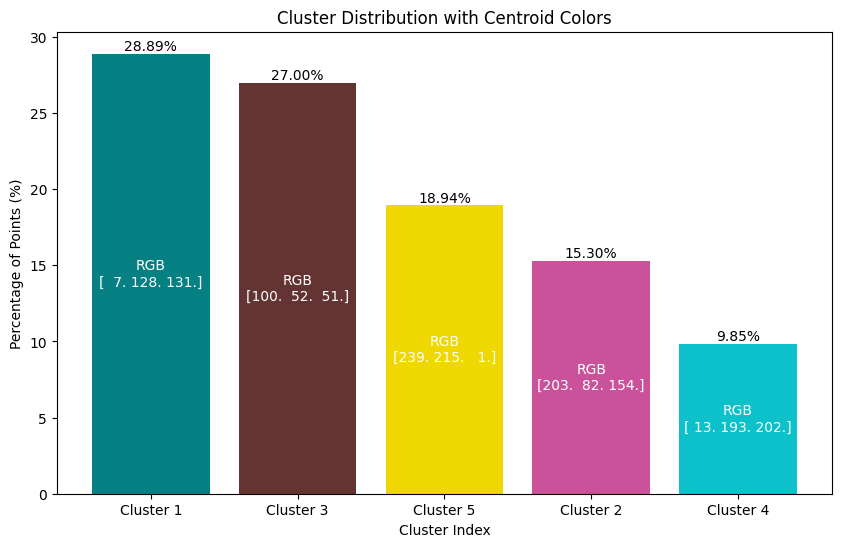

In [ ]:
# Call the function to plot
plot_clusters_with_percentages(cluster_counts, centroid_colors, centroids)